Import modules

In [1]:
from pyvad import vad
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

Speech data load<br>
Speech data from http://www.voice-pro.jp/announce/.

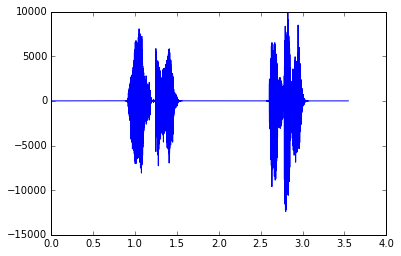

In [2]:
name = "test/C-28.wav"
fs, data = read(name)
data = np.mean(data, axis=1).astype(data.dtype) # stereo to mono
time = np.linspace(0, len(data)/fs, len(data)) # time axis
plt.plot(time, data)
plt.show()

Do VAD (int)

In [3]:
%time vact = vad(data, fs, fs_vad = 16000, hoplength = 30, vad_mode=0)

CPU times: user 124 ms, sys: 1.91 ms, total: 126 ms
Wall time: 125 ms


Plot result

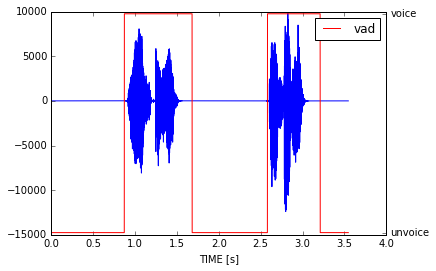

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(time, data, color = 'b', label='speech waveform')
ax1.set_xlabel("TIME [s]")

ax2=ax1.twinx()
ax2.plot(time, vact, color="r", label = 'vad')
plt.yticks([0, 1] ,('unvoice', 'voice'))
ax2.set_ylim([-0.01, 1.01])

plt.legend()
plt.show()

Do VAD (float)

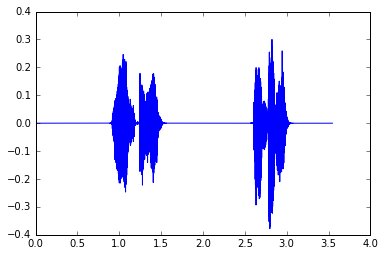

CPU times: user 117 ms, sys: 524 µs, total: 118 ms
Wall time: 118 ms


In [5]:
dataf = data.astype('float')/2**15
plt.plot(time, dataf)
plt.show()
%time vact = vad(dataf, fs, fs_vad = 16000, hoplength = 30, vad_mode=0)

Plot result

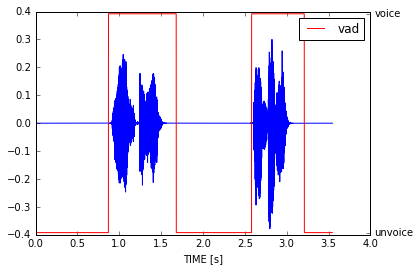

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(time, dataf, color = 'b', label='speech waveform')
ax1.set_xlabel("TIME [s]")

ax2=ax1.twinx()
ax2.plot(time, vact, color="r", label = 'vad')
plt.yticks([0, 1] ,('unvoice', 'voice'))
ax2.set_ylim([-0.01, 1.01])

plt.legend()
plt.show()